In [1]:
import Objects.population as pop
import Objects.sudoku as sudoku
import numpy as np
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import t

In [31]:
import pickle

file_name = 'Runs history/test_crossovers.pkl'

with open(file_name, 'rb') as file:
   history_dict = pickle.load(file)

In [36]:
xo_types = ['multi-point', 'single-point', 'cycle', 
             'special-xo', 'single_point_tabular']#, 'row_wise_cycle']

In [39]:
for j in xo_types:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"XO type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.mean(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    print(f"Mean fitness at the end of run: {np.round(df['mean'].iloc[-1],2)}, 95% CI: [{np.round(df['CI_low'].iloc[-1],2)}, {np.round(df['CI_high'].iloc[-1],2)}]")

XO type: multi-point, Percentage solved: 0.0 %
Mean fitness at the end of run: 11.43, 95% CI: [7.83, 15.04]
XO type: single-point, Percentage solved: 0.0 %
Mean fitness at the end of run: 12.47, 95% CI: [8.53, 16.4]
XO type: cycle, Percentage solved: 0.0 %
Mean fitness at the end of run: 6.87, 95% CI: [4.7, 9.03]
XO type: special-xo, Percentage solved: 0.0 %
Mean fitness at the end of run: 10.87, 95% CI: [7.44, 14.3]
XO type: single_point_tabular, Percentage solved: 13.33 %
Mean fitness at the end of run: 4.4, 95% CI: [3.01, 5.79]


XO Type: multi-point, Percentage solved: 0.0 %


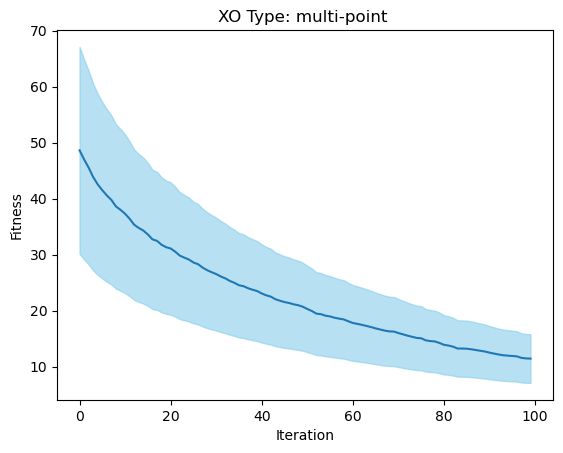

XO Type: single-point, Percentage solved: 0.0 %


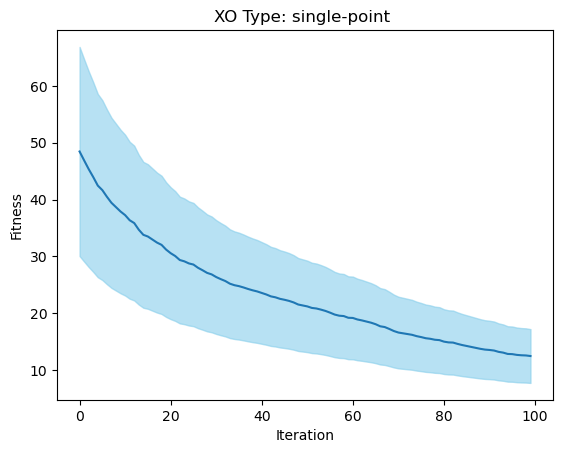

XO Type: cycle, Percentage solved: 0.0 %


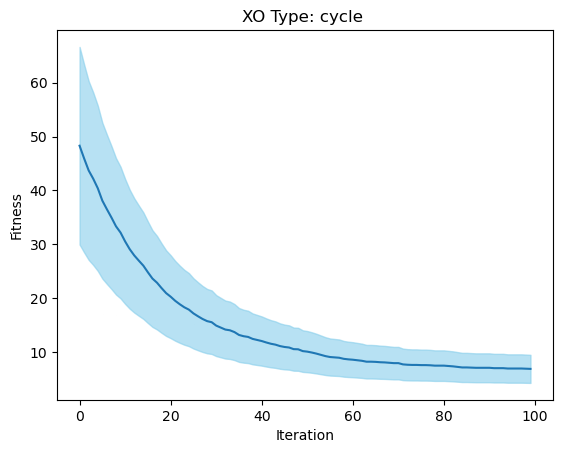

XO Type: special-xo, Percentage solved: 0.0 %


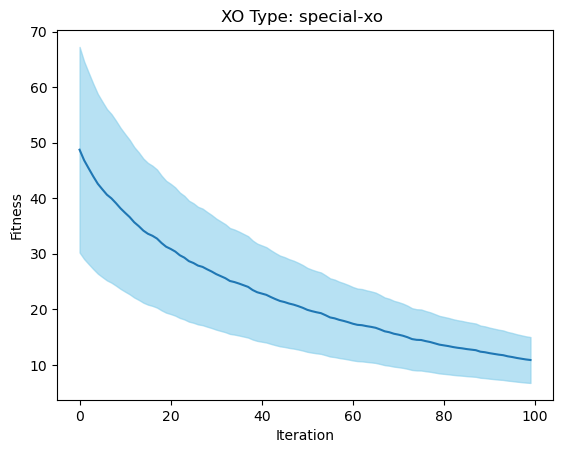

XO Type: single_point_tabular, Percentage solved: 13.33 %


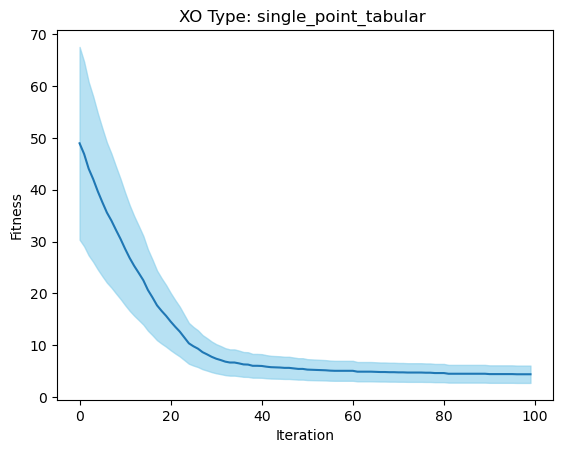

In [40]:
for j in xo_types:
    hist = history_dict[j]
    df = pd.DataFrame(hist).T.map(lambda x: (0,0,0) if pd.isna(x) else x).map(lambda x: 0 if max(np.isnan(x)) else x[0])
    print(f"XO Type: {j}, Percentage solved: {np.round(sum(df.iloc[-1]==0)/df.shape[1]*100, 2)} %")
    df['mean'] = df.mean(axis=1)
    df['std'] = df.mean(axis=1)
    t_st = t.ppf(0.975, 29)
    df['CI_low'] = df['mean'] - t_st*df['std']/np.sqrt(29)
    df['CI_high'] = df['mean'] + t_st*df['std']/np.sqrt(29)
    plt.fill_between(df.index, df['CI_low'], df['CI_high'], color='skyblue', alpha=.6)
    plt.plot(df['mean'])
    # plt.plot(pd.DataFrame(i).T[0])
    plt.title(f"XO Type: {j} ")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()

Best individual of gen #1: 60
Best individual of gen #2: 59
Best individual of gen #3: 59
Best individual of gen #4: 56
Best individual of gen #5: 50
Best individual of gen #6: 50
Best individual of gen #7: 50
Best individual of gen #8: 49
Best individual of gen #9: 48
Best individual of gen #10: 46
Best individual of gen #11: 42
Best individual of gen #12: 42
Best individual of gen #13: 42
Best individual of gen #14: 42
Best individual of gen #15: 35
Best individual of gen #16: 35
Best individual of gen #17: 34
Best individual of gen #18: 34
Best individual of gen #19: 34
Best individual of gen #20: 34
Best individual of gen #21: 32
Best individual of gen #22: 32
Best individual of gen #23: 32
Best individual of gen #24: 32
Best individual of gen #25: 30
Best individual of gen #26: 30
Best individual of gen #27: 29
Best individual of gen #28: 29
Best individual of gen #29: 29
Best individual of gen #30: 26
Best individual of gen #31: 26
Best individual of gen #32: 26
Best individual o

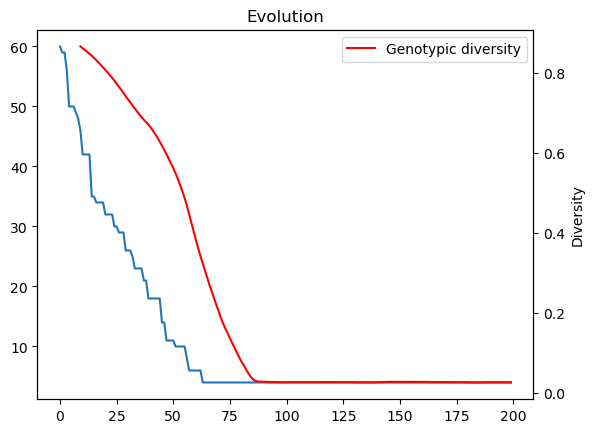

In [16]:
hard_board = np.array([
    [0, 8, 0, 0, 0, 4, 0, 0, 5],
    [0, 5, 0, 0, 0, 2, 0, 0, 4],
    [1, 0, 4, 0, 0, 0, 7, 0, 0],
    [0, 0, 0, 1, 0, 5, 0, 0, 9],
    [0, 0, 7, 0, 0, 0, 1, 0, 0],
    [6, 0, 0, 3, 0, 7, 0, 0, 0],
    [0, 0, 9, 0, 0, 0, 8, 0, 1],
    [8, 0, 0, 2, 0, 0, 0, 3, 0],
    [4, 0, 0, 7, 0, 0, 0, 5, 0]
])

population = pop.Population(size=500, initial_board=hard_board)
population.evolve(
    gens = 200,
    xo_prob = 0.9,
    mut_prob = 0.9,
    select_type='roulette',
    xo='single_point_tabular',
    direction= 'random',
    mutation='change-smart',
    elite_size=200,
    swap_number=1,
    diversify='fitness-sharing',
    verbose= True,
    plateau_threshold=10,
    invert_distances=True,
    normalize_distances=False
)

population.plot_history( genodiv=True)

In [2]:
test_board = np.array([[9, 4, 7, 3, 2, 6, 5, 8, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [4, 7, 3, 5, 9, 2, 1, 6, 8],
       [1, 2, 9, 8, 0, 4, 7, 3, 5],
       [5, 6, 8, 7, 1, 3, 4, 9, 2],
       [7, 9, 2, 4, 0, 8, 3, 1, 6],
       [6, 1, 5, 2, 3, 9, 8, 7, 4],

       [3, 8, 4, 6, 7, 1, 2, 5, 9]])

In [3]:
n_changes = 4

np.random.choice(np.arange(8), size = (n_changes,2), replace=False)

array([[1, 3],
       [7, 4],
       [0, 2],
       [5, 6]])

In [5]:
a = sudoku.Sudoku(test_board, fill_board='row_wise')
print(a.board)
a.mutate(1,1,'swap-row')
print(a.board)

[[9 4 7 3 2 6 5 8 1]
 [1 8 5 4 3 7 9 2 6]
 [1 6 5 3 7 8 9 2 4]
 [4 7 3 5 9 2 1 6 8]
 [1 2 9 8 6 4 7 3 5]
 [5 6 8 7 1 3 4 9 2]
 [7 9 2 4 5 8 3 1 6]
 [6 1 5 2 3 9 8 7 4]
 [3 8 4 6 7 1 2 5 9]]
[[9 4 7 3 2 6 5 8 1]
 [1 8 5 4 3 7 9 2 6]
 [1 6 5 2 7 8 9 3 4]
 [4 7 3 5 9 2 1 6 8]
 [1 2 9 8 6 4 7 3 5]
 [5 6 8 7 1 3 4 9 2]
 [7 9 2 4 5 8 3 1 6]
 [6 1 5 2 3 9 8 7 4]
 [3 8 4 6 7 1 2 5 9]]


In [3]:
population = pop.Population(size=20, initial_board=test_board)

In [5]:
population.row_wise_cycle(prob=0.5, keep_distribution=False)

population.individuals


[[[9 4 7 3 2 6 5 8 1]
  [1 3 6 4 2 8 7 1 5]
  [7 9 3 9 6 8 2 5 4]
  [4 7 3 5 9 2 1 6 8]
  [1 2 9 8 4 4 7 3 5]
  [5 6 8 7 1 3 4 9 2]
  [7 9 2 4 5 8 3 1 6]
  [6 1 5 2 3 9 8 7 4]
  [3 8 4 6 7 1 2 5 9]],
 [[9 4 7 3 2 6 5 8 1]
  [6 6 1 9 4 3 5 7 8]
  [9 8 3 1 1 4 5 7 5]
  [4 7 3 5 9 2 1 6 8]
  [1 2 9 8 5 4 7 3 5]
  [5 6 8 7 1 3 4 9 2]
  [7 9 2 4 6 8 3 1 6]
  [6 1 5 2 3 9 8 7 4]
  [3 8 4 6 7 1 2 5 9]],
 [[9 4 7 3 2 6 5 8 1]
  [9 4 6 2 6 8 5 3 7]
  [6 8 7 7 1 4 9 1 2]
  [4 7 3 5 9 2 1 6 8]
  [1 2 9 8 8 4 7 3 5]
  [5 6 8 7 1 3 4 9 2]
  [7 9 2 4 3 8 3 1 6]
  [6 1 5 2 3 9 8 7 4]
  [3 8 4 6 7 1 2 5 9]],
 [[9 4 7 3 2 6 5 8 1]
  [7 1 2 6 6 5 6 4 8]
  [2 6 9 8 1 4 3 5 7]
  [4 7 3 5 9 2 1 6 8]
  [1 2 9 8 6 4 7 3 5]
  [5 6 8 7 1 3 4 9 2]
  [7 9 2 4 8 8 3 1 6]
  [6 1 5 2 3 9 8 7 4]
  [3 8 4 6 7 1 2 5 9]],
 [[9 4 7 3 2 6 5 8 1]
  [3 5 5 4 6 2 5 1 9]
  [4 6 4 5 8 9 3 3 2]
  [4 7 3 5 9 2 1 6 8]
  [1 2 9 8 5 4 7 3 5]
  [5 6 8 7 1 3 4 9 2]
  [7 9 2 4 5 8 3 1 6]
  [6 1 5 2 3 9 8 7 4]
  [3 8 4 6 7 1 2 5 9]],


In [17]:
for i in range(len(a)):
    print(a[i])

9
4
7
3
2
6
5
8
1


In [5]:
for i in range(1000):
    population.single_point_tabular(prob = 1, direction='random')
population.individuals

[[[9 4 7 3 2 6 5 8 1]
  [9 1 6 2 7 3 3 7 3]
  [7 8 8 8 4 9 2 7 4]
  [4 7 3 5 9 2 1 6 8]
  [1 2 9 8 5 4 7 3 5]
  [5 6 8 7 1 3 4 9 2]
  [7 9 2 4 5 8 3 1 6]
  [6 1 5 2 3 9 8 7 4]
  [3 8 4 6 7 1 2 5 9]],
 [[9 4 7 3 2 6 5 8 1]
  [2 6 6 3 9 4 6 6 1]
  [9 5 5 8 6 5 1 4 1]
  [4 7 3 5 9 2 1 6 8]
  [1 2 9 8 2 4 7 3 5]
  [5 6 8 7 1 3 4 9 2]
  [7 9 2 4 5 8 3 1 6]
  [6 1 5 2 3 9 8 7 4]
  [3 8 4 6 7 1 2 5 9]]]

In [5]:
# !pip install py-sudoku
from sudoku import Sudoku 

In [6]:
puzzle = Sudoku().difficulty(0.05)
test_board = np.where(np.array(puzzle.board) == None, 0, np.array(puzzle.board)).astype(int)
test_board

array([[0, 9, 0, 2, 6, 1, 4, 5, 7],
       [2, 5, 7, 4, 3, 8, 6, 9, 1],
       [4, 1, 6, 7, 5, 9, 3, 2, 8],
       [6, 3, 5, 8, 9, 4, 7, 1, 2],
       [1, 4, 9, 5, 2, 7, 8, 3, 6],
       [7, 2, 8, 6, 1, 3, 9, 4, 5],
       [9, 0, 1, 3, 7, 2, 5, 8, 4],
       [5, 8, 2, 9, 4, 6, 1, 7, 3],
       [3, 7, 0, 1, 8, 5, 2, 6, 9]])

In [4]:
plt.plot(pd.DataFrame(population.history).T[0])

NameError: name 'population' is not defined

In [2]:
test_board = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [9, 6, 2, 0, 5, 7, 0, 4, 3],
       [0, 5, 7, 8, 3, 4, 2, 0, 9],
       [7, 3, 0, 5, 8, 9, 4, 2, 6],
       [8, 2, 4, 6, 7, 1, 9, 0, 5],
       [6, 9, 5, 3, 4, 2, 0, 7, 8]])

In [ ]:
population = pop.Population(size=10, initial_board=test_board)

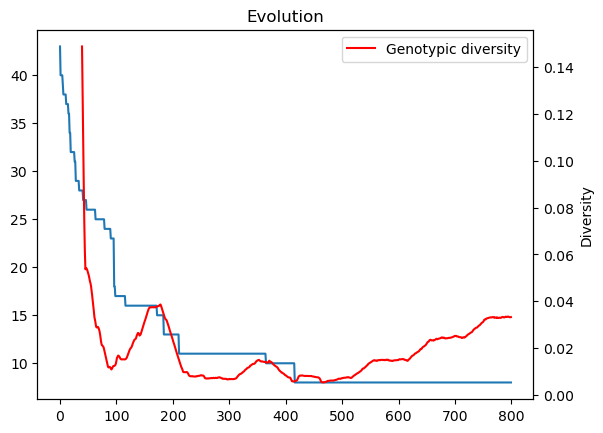

In [14]:
population.plot_history(ma_smooth_ratio=0.05, genodiv=True)

In [34]:
prob = 1
# Get the number of parents and the shape of each parent
num_parents = len(population)

# Sample how many crossovers to do
num_crossovers = sum(np.random.choice([0,1], size = int(num_parents/2), replace=True, p=[1-prob, prob]))

# Select two random parents for each offspring without replacement
parent_indices = np.random.choice(num_parents, size=(num_crossovers,2), replace=False)

parent_indices

array([[2, 1],
       [7, 8],
       [5, 4],
       [0, 3],
       [6, 9]])

In [37]:
i = 0

parent_indices[i]

array([2, 1])

In [ ]:
for i in range(len(parent_indices)):
    board = deepcopy(population.individuals[i].board)


In [88]:
np.random.randint(population.individuals[0].N)

2

In [89]:
population.individuals[i-1].board[:, :0]

array([], shape=(9, 0), dtype=int64)

In [101]:
direction  = 'columns'

In [105]:
population.individuals[ind[0]].board[:crossover_point, :]

array([[9, 4, 7, 3, 2, 6, 5, 8, 1],
       [7, 7, 5, 4, 6, 8, 2, 9, 2]])

In [107]:
population.individuals[ind[1]].board[crossover_point:, :]


array([[2, 2, 6, 1, 8, 5, 6, 5, 8],
       [4, 7, 3, 5, 9, 2, 1, 6, 8],
       [1, 2, 9, 8, 9, 4, 7, 3, 5],
       [5, 6, 8, 7, 1, 3, 4, 9, 2],
       [7, 9, 2, 4, 5, 8, 3, 1, 6],
       [6, 1, 5, 2, 3, 9, 8, 7, 4],
       [3, 8, 4, 6, 7, 1, 2, 5, 9]])

In [104]:
np.concatenate((population.individuals[ind[0]].board[:crossover_point, :], 
                                population.individuals[ind[1]].board[crossover_point:, :]), axis = 1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 7

In [108]:
offspring = []
if direction == 'rows':
    for i in range(len(parent_indices)):
        crossover_point = np.random.randint(population.individuals[0].N)
        ind = parent_indices[i]
        offspring1 = np.concatenate((population.individuals[ind[0]].board[:, :crossover_point], 
                                population.individuals[ind[1]].board[:, crossover_point:]), axis = 1)
        offspring2 = np.concatenate((population.individuals[ind[1]].board[:, :crossover_point], 
                                population.individuals[ind[0]].board[:, crossover_point:]), axis = 1)
        offspring.append(offspring1)
        offspring.append(offspring2)

if direction == 'columns':
    for i in range(len(parent_indices)):
        crossover_point = np.random.randint(population.individuals[0].N)
        ind = parent_indices[i]
        offspring1 = np.concatenate((population.individuals[ind[0]].board[:crossover_point, :], 
                                population.individuals[ind[1]].board[crossover_point:, :]), axis = 0)
        offspring2 = np.concatenate((population.individuals[ind[1]].board[:crossover_point, :], 
                                population.individuals[ind[0]].board[crossover_point:, :]), axis = 0)
        offspring.append(offspring1)
        offspring.append(offspring2)
        
if direction == 'random':
    for i in range(len(parent_indices)):
        type = np.random.choice(['rows', 'cols'])

        if type == 'rows':
            crossover_point = np.random.randint(population.individuals[0].N)
            ind = parent_indices[i]
            offspring1 = np.concatenate((population.individuals[ind[0]].board[:, :crossover_point], 
                                    population.individuals[ind[1]].board[:, crossover_point:]), axis = 1)
            offspring2 = np.concatenate((population.individuals[ind[1]].board[:, :crossover_point], 
                                    population.individuals[ind[0]].board[:, crossover_point:]), axis = 1)
            offspring.append(offspring1)
            offspring.append(offspring2)

        if type == 'columns':
            crossover_point = np.random.randint(population.individuals[0].N)
            ind = parent_indices[i]
            offspring1 = np.concatenate((population.individuals[ind[0]].board[:crossover_point, :], 
                                    population.individuals[ind[1]].board[crossover_point:, :]), axis = 0)
            offspring2 = np.concatenate((population.individuals[ind[1]].board[:crossover_point, :], 
                                    population.individuals[ind[0]].board[crossover_point:, :]), axis = 0)
            offspring.append(offspring1)
            offspring.append(offspring2)

In [ ]:
offspring1 = np.concatenate((population.individuals[ind[0]].board[:, :crossover_point], 
                            population.individuals[ind[1]].board[:, crossover_point:]), axis = 1)

In [96]:
population.individuals[ind[0]].board[crossover_point:, :]

array([[7, 9, 2, 4, 5, 8, 3, 1, 6],
       [6, 1, 5, 2, 3, 9, 8, 7, 4],
       [3, 8, 4, 6, 7, 1, 2, 5, 9]])

In [109]:
offspring

[array([[9, 4, 7, 3, 2, 6, 5, 8, 1],
        [7, 7, 5, 4, 6, 8, 2, 9, 2],
        [6, 4, 6, 1, 8, 3, 9, 1, 3],
        [4, 7, 3, 5, 9, 2, 1, 6, 8],
        [1, 2, 9, 8, 5, 4, 7, 3, 5],
        [5, 6, 8, 7, 1, 3, 4, 9, 2],
        [7, 9, 2, 4, 5, 8, 3, 1, 6],
        [6, 1, 5, 2, 3, 9, 8, 7, 4],
        [3, 8, 4, 6, 7, 1, 2, 5, 9]]),
 array([[9, 4, 7, 3, 2, 6, 5, 8, 1],
        [3, 7, 6, 1, 4, 7, 4, 3, 9],
        [2, 2, 6, 1, 8, 5, 6, 5, 8],
        [4, 7, 3, 5, 9, 2, 1, 6, 8],
        [1, 2, 9, 8, 9, 4, 7, 3, 5],
        [5, 6, 8, 7, 1, 3, 4, 9, 2],
        [7, 9, 2, 4, 5, 8, 3, 1, 6],
        [6, 1, 5, 2, 3, 9, 8, 7, 4],
        [3, 8, 4, 6, 7, 1, 2, 5, 9]]),
 array([[9, 4, 7, 3, 2, 6, 5, 8, 1],
        [8, 5, 7, 2, 9, 1, 3, 4, 9],
        [2, 1, 5, 8, 7, 6, 6, 3, 4],
        [4, 7, 3, 5, 9, 2, 1, 6, 8],
        [1, 2, 9, 8, 6, 4, 7, 3, 5],
        [5, 6, 8, 7, 1, 3, 4, 9, 2],
        [7, 9, 2, 4, 5, 8, 3, 1, 6],
        [6, 1, 5, 2, 3, 9, 8, 7, 4],
        [3, 8, 4, 6, 7, 1, 2, 5, 9

In [91]:
np.concatenate((population.individuals[i-1].board[:, :0], population.individuals[i].board[:, 0:]), axis = 1)

array([[9, 4, 7, 3, 2, 6, 5, 8, 1],
       [7, 1, 1, 6, 4, 9, 2, 6, 2],
       [9, 7, 8, 8, 3, 6, 5, 3, 4],
       [4, 7, 3, 5, 9, 2, 1, 6, 8],
       [1, 2, 9, 8, 5, 4, 7, 3, 5],
       [5, 6, 8, 7, 1, 3, 4, 9, 2],
       [7, 9, 2, 4, 5, 8, 3, 1, 6],
       [6, 1, 5, 2, 3, 9, 8, 7, 4],
       [3, 8, 4, 6, 7, 1, 2, 5, 9]])

In [38]:
i = 5
population.individuals[i].board

array([[9, 4, 7, 3, 2, 6, 5, 8, 1],
       [7, 1, 1, 6, 4, 9, 2, 6, 2],
       [9, 7, 8, 8, 3, 6, 5, 3, 4],
       [4, 7, 3, 5, 9, 2, 1, 6, 8],
       [1, 2, 9, 8, 5, 4, 7, 3, 5],
       [5, 6, 8, 7, 1, 3, 4, 9, 2],
       [7, 9, 2, 4, 5, 8, 3, 1, 6],
       [6, 1, 5, 2, 3, 9, 8, 7, 4],
       [3, 8, 4, 6, 7, 1, 2, 5, 9]])

In [15]:
population.individuals[0].swap_points

array([[False, False, False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False,  True, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False]])

In [11]:
parent1

array([[7, 1, 1, 6, 4, 9, 2, 6, 2, 9, 7, 8, 8, 3, 6, 5, 3, 4, 5],
       [5, 9, 1, 6, 2, 1, 5, 7, 6, 2, 9, 8, 7, 4, 3, 4, 6, 8, 3],
       [3, 7, 6, 1, 4, 7, 4, 3, 9, 2, 2, 6, 1, 8, 5, 6, 5, 8, 9],
       [7, 7, 5, 4, 6, 8, 2, 9, 2, 6, 4, 6, 1, 8, 3, 9, 1, 3, 5],
       [1, 5, 6, 7, 8, 9, 6, 4, 2, 2, 3, 5, 3, 7, 9, 6, 4, 1, 8]])

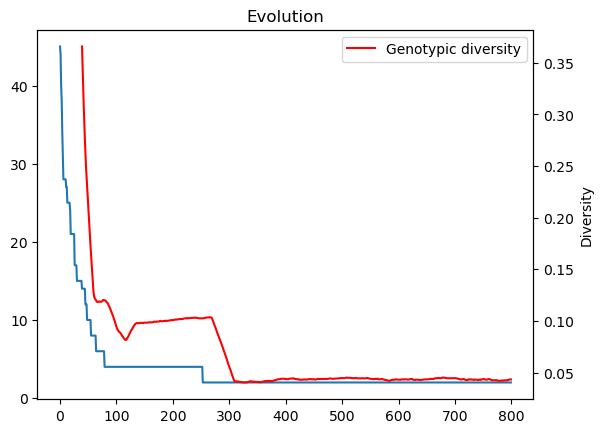

In [34]:
population.plot_history(ma_smooth_ratio=0.05, genodiv=True)

In [9]:
population = pop.Population(size=10, initial_board=test_board)
# population.evolve(
#     gens = 800,
#     xo_prob = 0.9,
#     mut_prob = 0.6,
#     select_type='tournament',
#     xo='cycle',
#     mutation='swap',
#     elite_size=30,
#     swap_number=1,
#     diversify='fitness-sharing',
#     verbose= True
# )

In [3]:
history_dict = {}
xo_types = ['multi-point', 'single-point', 'cycle',  'special-xo']
for j in xo_types:
    histories = []
    for i in tqdm(range(10)):
        population = pop.Population(size=100, initial_board=test_board)
        population.evolve(
            gens = 800,
            xo_prob = 0.9,
            mut_prob = 0.05,
            select_type='roulette',
            xo=j,
            mutation='swap-smart',
            elite_size=50,
            swap_number=1,
            diversify='fitness-sharing',
            verbose= False
        )
        histories.append(population.history)
    history_dict[j] = histories
# population.plot_history(ma_smooth_ratio=0.05, genodiv=False, phenodiv=True)

  0%|          | 0/10 [00:00<?, ?it/s]

Plateau reached at generation 403! New mut_prob: 0.25.
Plateau reached at generation 503! New mut_prob: 0.45.
Plateau reached at generation 652! New mut_prob: 0.25.


 10%|█         | 1/10 [00:25<03:50, 25.63s/it]

Plateau reached at generation 153! New mut_prob: 0.25.
Plateau reached at generation 503! New mut_prob: 0.25.
Plateau reached at generation 603! New mut_prob: 0.45.
Plateau reached at generation 703! New mut_prob: 0.65.


 20%|██        | 2/10 [00:54<03:38, 27.32s/it]

Plateau reached at generation 356! New mut_prob: 0.25.
Plateau reached at generation 459! New mut_prob: 0.25.
Plateau reached at generation 559! New mut_prob: 0.45.
Plateau reached at generation 694! New mut_prob: 0.25.


 30%|███       | 3/10 [01:18<03:00, 25.84s/it]

Plateau reached at generation 410! New mut_prob: 0.25.
Plateau reached at generation 578! New mut_prob: 0.25.
Plateau reached at generation 678! New mut_prob: 0.45.
Plateau reached at generation 778! New mut_prob: 0.65.


 40%|████      | 4/10 [01:45<02:37, 26.27s/it]

Plateau reached at generation 150! New mut_prob: 0.25.
Plateau reached at generation 285! New mut_prob: 0.25.
Plateau reached at generation 447! New mut_prob: 0.25.
Plateau reached at generation 601! New mut_prob: 0.25.
Plateau reached at generation 723! New mut_prob: 0.25.


 50%|█████     | 5/10 [02:09<02:07, 25.53s/it]

Plateau reached at generation 374! New mut_prob: 0.25.
Plateau reached at generation 556! New mut_prob: 0.25.
Plateau reached at generation 745! New mut_prob: 0.25.


 60%|██████    | 6/10 [02:33<01:40, 25.22s/it]

Plateau reached at generation 397! New mut_prob: 0.25.
Plateau reached at generation 508! New mut_prob: 0.25.
Plateau reached at generation 624! New mut_prob: 0.25.


 70%|███████   | 7/10 [02:58<01:14, 24.93s/it]

Plateau reached at generation 388! New mut_prob: 0.25.
Plateau reached at generation 488! New mut_prob: 0.45.
Plateau reached at generation 588! New mut_prob: 0.65.
Plateau reached at generation 728! New mut_prob: 0.25.


 80%|████████  | 8/10 [03:25<00:51, 25.77s/it]

Plateau reached at generation 224! New mut_prob: 0.25.
Plateau reached at generation 740! New mut_prob: 0.25.


 90%|█████████ | 9/10 [03:49<00:25, 25.18s/it]

Plateau reached at generation 198! New mut_prob: 0.25.
Plateau reached at generation 377! New mut_prob: 0.25.
Plateau reached at generation 570! New mut_prob: 0.25.
Plateau reached at generation 748! New mut_prob: 0.25.


  0%|          | 0/10 [00:00<?, ?it/s]

Plateau reached at generation 427! New mut_prob: 0.25.
Plateau reached at generation 532! New mut_prob: 0.25.


 10%|█         | 1/10 [00:23<03:32, 23.56s/it]

Plateau reached at generation 800! New mut_prob: 0.25.
Plateau reached at generation 292! New mut_prob: 0.25.
Plateau reached at generation 446! New mut_prob: 0.25.
Plateau reached at generation 562! New mut_prob: 0.25.
Plateau reached at generation 733! New mut_prob: 0.25.


 20%|██        | 2/10 [00:47<03:11, 23.99s/it]

Plateau reached at generation 264! New mut_prob: 0.25.
Plateau reached at generation 394! New mut_prob: 0.25.
Plateau reached at generation 537! New mut_prob: 0.25.
Plateau reached at generation 637! New mut_prob: 0.45.
Plateau reached at generation 737! New mut_prob: 0.65.


 30%|███       | 3/10 [01:16<03:03, 26.21s/it]

Plateau reached at generation 536! New mut_prob: 0.25.
Plateau reached at generation 687! New mut_prob: 0.25.
Plateau reached at generation 790! New mut_prob: 0.25.


 40%|████      | 4/10 [01:40<02:31, 25.26s/it]

Plateau reached at generation 377! New mut_prob: 0.25.
Plateau reached at generation 533! New mut_prob: 0.25.
Plateau reached at generation 658! New mut_prob: 0.25.


 50%|█████     | 5/10 [02:05<02:05, 25.15s/it]

Plateau reached at generation 799! New mut_prob: 0.25.
Plateau reached at generation 526! New mut_prob: 0.25.
Plateau reached at generation 702! New mut_prob: 0.25.


 60%|██████    | 6/10 [02:29<01:38, 24.73s/it]

Plateau reached at generation 447! New mut_prob: 0.25.
Plateau reached at generation 547! New mut_prob: 0.45.
Plateau reached at generation 760! New mut_prob: 0.25.


 70%|███████   | 7/10 [02:55<01:15, 25.23s/it]

Plateau reached at generation 350! New mut_prob: 0.25.
Plateau reached at generation 511! New mut_prob: 0.25.
Plateau reached at generation 696! New mut_prob: 0.25.


 80%|████████  | 8/10 [03:21<00:50, 25.43s/it]

Plateau reached at generation 796! New mut_prob: 0.45.
Plateau reached at generation 248! New mut_prob: 0.25.
Plateau reached at generation 348! New mut_prob: 0.45.
Plateau reached at generation 448! New mut_prob: 0.65.
Plateau reached at generation 597! New mut_prob: 0.25.
Plateau reached at generation 697! New mut_prob: 0.45.


 90%|█████████ | 9/10 [03:51<00:27, 27.00s/it]

Plateau reached at generation 444! New mut_prob: 0.25.
Plateau reached at generation 544! New mut_prob: 0.45.
Plateau reached at generation 644! New mut_prob: 0.65.


  0%|          | 0/10 [00:00<?, ?it/s]

Plateau reached at generation 207! New mut_prob: 0.25.
Plateau reached at generation 342! New mut_prob: 0.25.
Plateau reached at generation 442! New mut_prob: 0.45.
Plateau reached at generation 542! New mut_prob: 0.65.
Plateau reached at generation 642! New mut_prob: 0.8500000000000001.
Plateau reached at generation 783! New mut_prob: 0.25.


 10%|█         | 1/10 [00:51<07:43, 51.51s/it]

Plateau reached at generation 217! New mut_prob: 0.25.
Plateau reached at generation 449! New mut_prob: 0.25.
Plateau reached at generation 549! New mut_prob: 0.45.
Plateau reached at generation 649! New mut_prob: 0.65.
Plateau reached at generation 749! New mut_prob: 0.8500000000000001.


 20%|██        | 2/10 [01:45<07:02, 52.81s/it]

Plateau reached at generation 335! New mut_prob: 0.25.
Plateau reached at generation 465! New mut_prob: 0.25.
Plateau reached at generation 575! New mut_prob: 0.25.
Plateau reached at generation 752! New mut_prob: 0.25.


 30%|███       | 3/10 [02:29<05:43, 49.02s/it]

Plateau reached at generation 313! New mut_prob: 0.25.
Plateau reached at generation 415! New mut_prob: 0.25.
Plateau reached at generation 550! New mut_prob: 0.25.


 40%|████      | 4/10 [05:16<09:32, 95.34s/it]

Plateau reached at generation 797! New mut_prob: 0.25.
Plateau reached at generation 340! New mut_prob: 0.25.
Plateau reached at generation 525! New mut_prob: 0.25.
Plateau reached at generation 699! New mut_prob: 0.25.


 50%|█████     | 5/10 [06:01<06:26, 77.28s/it]

Plateau reached at generation 346! New mut_prob: 0.25.
Plateau reached at generation 541! New mut_prob: 0.25.
Plateau reached at generation 641! New mut_prob: 0.45.
Plateau reached at generation 765! New mut_prob: 0.25.


 60%|██████    | 6/10 [06:49<04:29, 67.29s/it]

Plateau reached at generation 286! New mut_prob: 0.25.
Plateau reached at generation 386! New mut_prob: 0.45.
Plateau reached at generation 486! New mut_prob: 0.65.
Plateau reached at generation 599! New mut_prob: 0.25.


 70%|███████   | 7/10 [07:38<03:04, 61.49s/it]

Plateau reached at generation 279! New mut_prob: 0.25.
Plateau reached at generation 419! New mut_prob: 0.25.
Plateau reached at generation 617! New mut_prob: 0.25.


 80%|████████  | 8/10 [08:21<01:51, 55.66s/it]

Plateau reached at generation 271! New mut_prob: 0.25.
Plateau reached at generation 519! New mut_prob: 0.25.
Plateau reached at generation 619! New mut_prob: 0.45.
Plateau reached at generation 719! New mut_prob: 0.65.


 90%|█████████ | 9/10 [08:50<00:47, 47.27s/it]

Plateau reached at generation 256! New mut_prob: 0.25.
Plateau reached at generation 356! New mut_prob: 0.45.
Plateau reached at generation 573! New mut_prob: 0.25.
Plateau reached at generation 673! New mut_prob: 0.45.
Plateau reached at generation 773! New mut_prob: 0.65.


  0%|          | 0/10 [00:00<?, ?it/s]

Plateau reached at generation 424! New mut_prob: 0.25.
Plateau reached at generation 638! New mut_prob: 0.25.
Plateau reached at generation 772! New mut_prob: 0.25.


 10%|█         | 1/10 [00:13<02:01, 13.49s/it]

Plateau reached at generation 381! New mut_prob: 0.25.
Plateau reached at generation 540! New mut_prob: 0.25.
Plateau reached at generation 640! New mut_prob: 0.45.
Plateau reached at generation 774! New mut_prob: 0.25.


 20%|██        | 2/10 [00:28<01:54, 14.32s/it]

Plateau reached at generation 280! New mut_prob: 0.25.
Plateau reached at generation 466! New mut_prob: 0.25.
Plateau reached at generation 566! New mut_prob: 0.45.
Plateau reached at generation 666! New mut_prob: 0.65.


 30%|███       | 3/10 [00:44<01:44, 14.97s/it]

Plateau reached at generation 297! New mut_prob: 0.25.
Plateau reached at generation 522! New mut_prob: 0.25.
Plateau reached at generation 722! New mut_prob: 0.25.


 40%|████      | 4/10 [00:57<01:25, 14.33s/it]

Plateau reached at generation 432! New mut_prob: 0.25.
Plateau reached at generation 758! New mut_prob: 0.25.


 50%|█████     | 5/10 [01:11<01:10, 14.05s/it]

Plateau reached at generation 413! New mut_prob: 0.25.
Plateau reached at generation 526! New mut_prob: 0.25.
Plateau reached at generation 664! New mut_prob: 0.25.
Plateau reached at generation 764! New mut_prob: 0.45.


 60%|██████    | 6/10 [01:25<00:57, 14.33s/it]

Plateau reached at generation 278! New mut_prob: 0.25.
Plateau reached at generation 381! New mut_prob: 0.25.
Plateau reached at generation 592! New mut_prob: 0.25.


 70%|███████   | 7/10 [01:39<00:42, 14.19s/it]

Plateau reached at generation 405! New mut_prob: 0.25.
Plateau reached at generation 681! New mut_prob: 0.25.


 80%|████████  | 8/10 [01:53<00:28, 14.13s/it]

Plateau reached at generation 774! New mut_prob: 0.25.


 90%|█████████ | 9/10 [02:07<00:14, 14.00s/it]

Plateau reached at generation 233! New mut_prob: 0.25.
Plateau reached at generation 546! New mut_prob: 0.25.
Plateau reached at generation 649! New mut_prob: 0.25.
Plateau reached at generation 788! New mut_prob: 0.25.


100%|██████████| 10/10 [02:21<00:00, 14.14s/it]


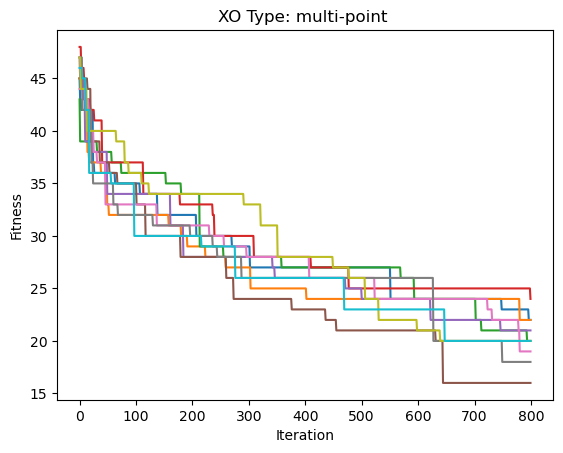

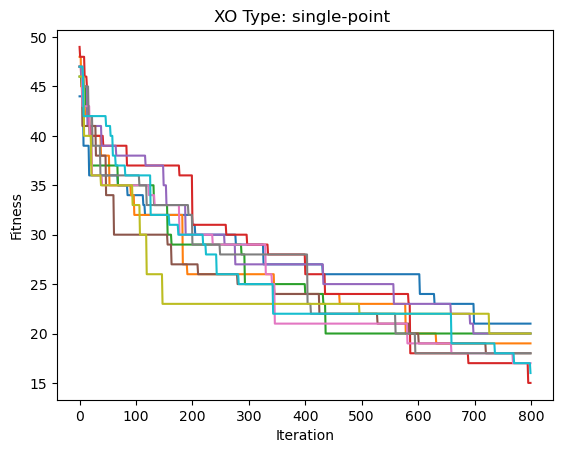

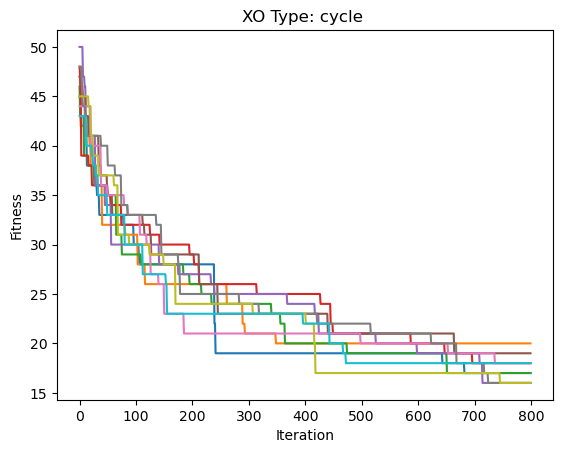

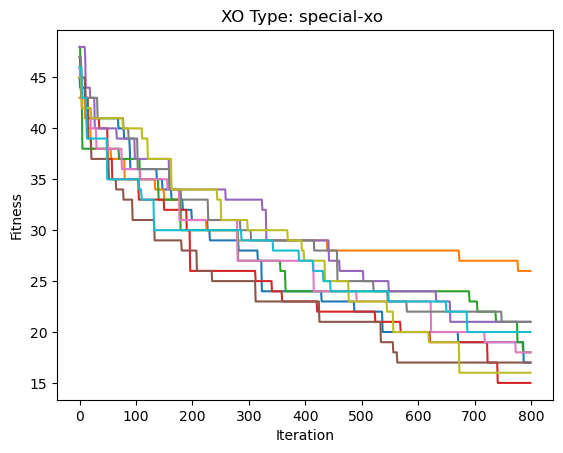

In [5]:
xo_types = ['multi-point', 'single-point', 'cycle',  'special-xo']
for j in xo_types:
    hist = history_dict[j]
    for i in hist:
        plt.plot(pd.DataFrame(i).T[0])
        plt.title(f"XO Type: {j} ")
        plt.xlabel("Iteration")
        plt.ylabel("Fitness")
    plt.show()

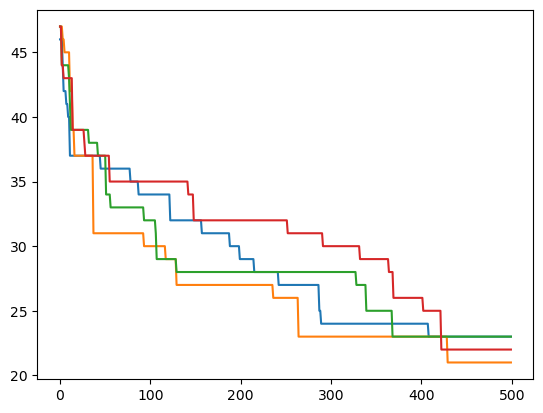

In [27]:
for i in histories:
    plt.plot(pd.DataFrame(i).T[0])

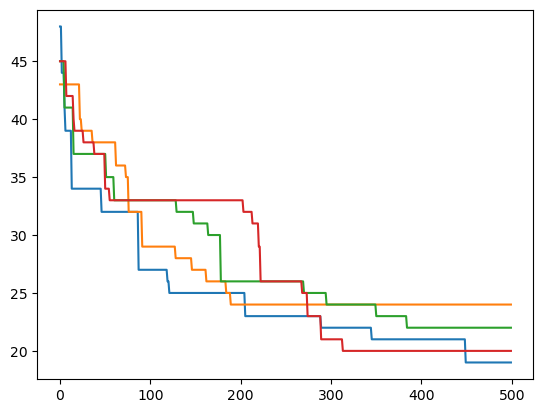

In [25]:
for i in histories:
    plt.plot(pd.DataFrame(i).T[0])

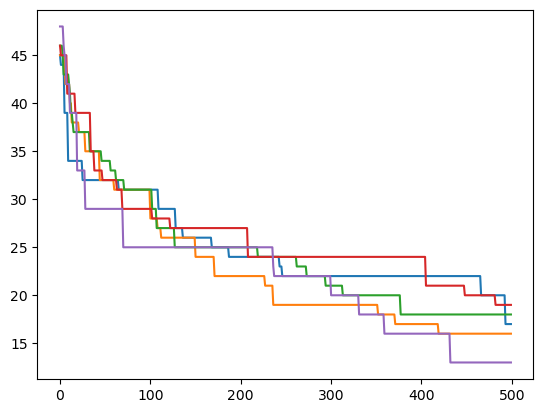

In [23]:
for i in histories:
    plt.plot(pd.DataFrame(i).T[0])

In [10]:
population = pop.Population(size=100, initial_board=test_board)

# population.evolve(
#         gens = 500,
#         xo_prob = 0.8,
#         mut_prob = 0.2,
#         select_type='roulette',
#         xo='special_xo',
#         mutation='swap-smart',
#         elite_size=20,
#         swap_number=1,
#         diversify='fitness-sharing',
#         verbose= True
#     )

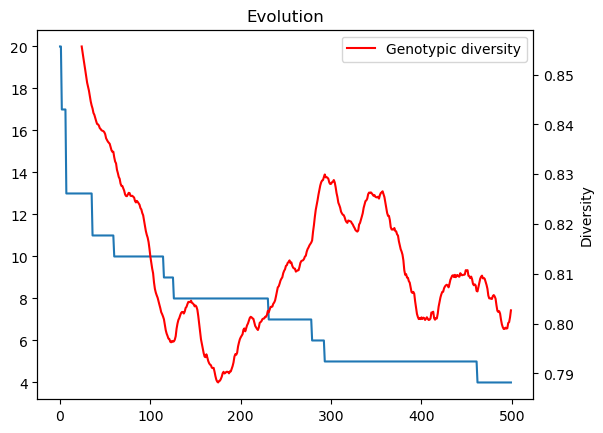

In [5]:
population.plot_history(genodiv=True)

In [16]:
population.cycle(prob = 1)

In [50]:
population.individuals[0].swappable

array([3, 4, 4, 9])

In [ ]:
[9 9 8 9 3 3 8 9 9 8 8 1]
[8 3 4 9 9 3 4 9 8 8 8 1]
[9 3 4 9 9 3 8 9 8 8 8 1]
[8 9 8 9 3 3 4 9 9 8 8 1]

In [17]:
np.bincount(population.individuals[0].swappable)

array([0, 2, 2, 2, 2, 2, 3, 2, 2, 2])

In [18]:
np.bincount(population.individuals[1].swappable)

array([0, 2, 2, 2, 2, 2, 3, 2, 2, 2])

In [19]:
np.bincount(population.individuals[2].swappable)

array([0, 2, 2, 2, 2, 2, 3, 2, 2, 2])

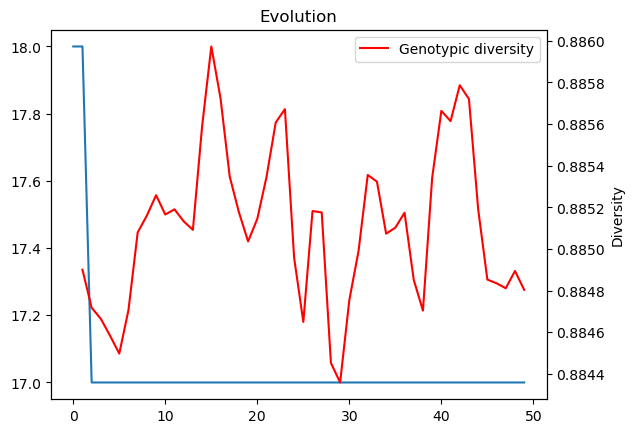

In [14]:
population.plot_history(genodiv=True)

In [4]:
prob = 1

population.cycle_crossover(prob)

[3, 5, 15, 16, 18]
[1, 2, 3, 4, 12]
[6, 7, 8, 11, 14, 15, 16, 17, 18]
[2, 3, 4, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18]
[4, 6, 9, 12, 14, 18]
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17]
[2, 3, 8, 11, 12, 13, 15, 18]
[6, 12, 16]
[3, 6, 7, 8, 9, 13, 14, 15, 16, 17]
[1, 2, 6, 8, 10, 12, 14, 15, 16]
[5, 9, 14, 16]
[4, 9, 17, 18]
[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17]
[1, 6, 11, 13]
[1, 2, 4, 5, 9, 10, 12, 13, 14, 16, 17]
[3, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 18]
[3, 6, 14, 15]
[2, 9, 11, 12, 15, 16]
[8, 10, 11, 12, 13, 15, 17]
[1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 16]
[3, 5, 7, 12, 13, 18]
[1, 3, 4, 5, 6, 11, 15, 17]
[1, 2, 3, 5, 6, 8, 18]
[2, 3, 4, 5, 10, 11, 15, 17, 18]
[1, 2, 3, 11, 12, 13, 14, 16]
[4, 5, 8, 9, 10, 12, 15, 17, 18]
[2, 3, 5, 6, 9, 11, 14]
[7, 12]
[1, 3, 5, 6, 9, 10, 12, 13, 15, 18]
[1, 4, 6, 18]
[1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[6, 8, 12, 13, 16, 17, 18]
[1, 2, 3, 4, 6, 7, 8, 9, 13, 15, 16, 18]
[1, 2, 3, 5, 6, 8, 9, 10

In [21]:
population.individuals[0].swappable

array([9, 7, 7, 6, 9, 3, 5, 7, 6, 6, 7, 3, 6, 7, 3, 6])

In [4]:
population.get_distances(normalize=True).max()

1.0

In [22]:
prob = 0.1

population_array = np.array([i.swappable for i in population.individuals])
                
# Get the number of parents and the shape of each parent
num_parents = len(population)
rows, cols = population_array.shape

# Sample how many crossovers to do
num_crossovers = sum(np.random.choice([0,1], size = int(num_parents/2), replace=True, p=[1-prob, prob]))

# Select two random parents for each offspring without replacement
parent_indices = np.random.choice(num_parents, size=(num_crossovers,2), replace=False)

# Matrices with parents from both sides
parent1 = population_array[parent_indices[:, 0]]
parent2 = population_array[parent_indices[:, 1]]

for i in range(len(parent1)):
    indicator = True
    current_position = 0
    available_indicies = list(np.arange(len(parent1[i])))
    while indicator:
        parent1[current_position]


In [76]:
parent1 = np.array([[1,3,6,5,5,4,9,9]])
parent2 = np.array([[9,1,3,5,6,9,5,4]])

In [61]:
parent1[0]

array([1, 3, 6, 5, 5, 4, 9, 9])

In [81]:
parent1[i][available_indicies]

array([3, 5, 4, 9])

In [86]:
mask = np.zeros(len(parent1[i]))
mask[available_indicies] = True
mask*parent1[i]

array([0., 3., 0., 0., 5., 4., 0., 9.])

In [91]:
np.where(mask*parent1[i] == parent2[i][current_position])[0]

array([], dtype=int64)

In [146]:
prob = 0.1

population_array = np.array([i.swappable for i in population.individuals])
                
# Get the number of parents and the shape of each parent
num_parents = len(population)
rows, cols = population_array.shape

# Sample how many crossovers to do
num_crossovers = sum(np.random.choice([0,1], size = int(num_parents/2), replace=True, p=[1-prob, prob]))

# Select two random parents for each offspring without replacement
parent_indices = np.random.choice(num_parents, size=(num_crossovers,2), replace=False)

# Matrices with parents from both sides
parent1 = population_array[parent_indices[:, 0]]
parent2 = population_array[parent_indices[:, 1]]

for i in range(len(parent1)):
    indicator = True
    current_position = 0
    available_indicies = list(np.arange(len(parent1[i])))
    while indicator:
        available_indicies.remove(current_position)
        mask = np.zeros(len(parent1[i]))
        mask[available_indicies] = True
        possible_next_indicies = np.where(mask*parent1[i] == parent2[i][current_position])[0]
        if len(possible_next_indicies) == 0:
            indicator = False
        else:
            current_position = np.random.choice(possible_next_indicies)
    print(available_indicies)
    all_indicies = list(np.arange(len(parent1[i])))
    used_indicies = list(set(all_indicies) - set(available_indicies))
    offspring1 = np.zeros(len(parent1[i]), dtype=int)
    offspring2 = np.zeros(len(parent1[i]), dtype=int)

    offspring1[available_indicies] = parent2[i][available_indicies]
    offspring1[used_indicies] = parent1[i][used_indicies]
    offspring2[available_indicies] = parent1[i][available_indicies]
    offspring2[used_indicies] = parent2[i][used_indicies]

[1, 5, 6, 7, 8, 9, 10, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14]
[2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14]
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[2, 5, 11, 13]
[1, 2, 3, 4, 5, 7, 9, 10, 12, 13, 14, 15]
[1, 2, 3, 5, 6, 8, 9, 10, 14, 15]
[1, 2, 3, 7, 8, 9, 10, 11, 12, 14, 15]
[1, 4, 5, 6, 9, 11, 12, 13, 14]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13]
[8, 13, 15]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 7, 8, 10, 11]
[1, 2, 3, 5, 6, 8, 10, 11, 12, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[1, 2, 3, 4, 6, 7, 8, 10, 11, 13, 14, 15]
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15]
[1, 2, 3, 5, 6, 7, 8, 9,

In [145]:
list(np.arange(len(parent1[i])))

IndexError: index 48 is out of bounds for axis 0 with size 48

In [138]:
parent1

array([[1, 3, 6, 5, 5, 4, 9, 9]])

In [139]:
parent2

array([[9, 1, 3, 5, 6, 9, 5, 4]])

In [141]:
offspring2

array([9, 1, 3, 5, 6, 4, 5, 9])

In [134]:
used_indicies

[0, 1, 2, 4, 6]

In [135]:
parent1[i][used_indicies]

array([1, 3, 6, 5, 9])

In [114]:
offspring1 = np.zeros(len(parent1[i]))

In [129]:
list(set(all_indicies) - set(available_indicies))

[0, 1, 2, 4, 6]

In [124]:
offspring1[available_indicies] = parent2[i][available_indicies]

In [125]:
offspring1

array([0., 0., 0., 5., 0., 9., 0., 4.])

In [122]:
parent2[0][available_indicies]

array([5, 9, 4])

In [110]:
parent2[available_indicies]

array([], shape=(0, 8), dtype=int64)

In [ ]:
self[i].swappable[indices_to_mask] = values_add

In [59]:
np.where(parent1[i][available_indicies] == parent2[i][current_position])[0]

array([], dtype=int64)

In [58]:
np.random.choice(np.where(parent1[i][available_indicies] == parent2[i][current_position])[0])

ValueError: 'a' cannot be empty unless no samples are taken

In [54]:
available_indicies

[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15]

In [49]:
np.where(parent1[i][available_indicies] == parent2[i][current_position])[0]

array([ 0,  3, 12])

In [48]:
np.random.choice(np.where(parent1[i][available_indicies] == parent2[i][current_position])[0])

12

In [37]:
i = 0
available_indicies = list(np.arange(len(parent1[i])))

In [41]:
parent1[0][[1,2,3,4]]

array([6, 3, 7, 5])

In [33]:
available_indicies = np.delete(available_indicies, 0)

In [34]:
available_indicies

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [27]:
np.arange(len(parent1[0]))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [23]:
parent1[0]

array([6, 6, 3, 7, 5, 9, 2, 3, 7, 3, 3, 5, 3, 6, 5, 7])

In [25]:
np.where(parent1[0] == 5)

(array([ 4, 11, 14]),)

In [24]:
parent2[0]

array([5, 2, 4, 5, 3, 9, 9, 4, 5, 7, 4, 6, 7, 2, 7, 5])

In [12]:
parent1.shape

(52, 19)

In [5]:
population.get_distances(normalize=False)

array([16791, 16825, 16731, 16818, 16860, 16833, 16892, 16884, 16808,
       16792, 16854, 16744, 16740, 16790, 16802, 16866, 16747, 16792,
       16877, 16780, 16835, 16803, 16775, 16848, 16845, 16807, 16806,
       16851, 16748, 16807, 16903, 16805, 16934, 16865, 16729, 16893,
       16876, 16810, 16733, 16869, 16834, 16897, 16851, 16735, 16913,
       16823, 16887, 16841, 16947, 16770, 16828, 16712, 16710, 16845,
       16842, 16917, 16809, 16830, 16883, 16878, 16892, 16848, 16847,
       16860, 16743, 16803, 16775, 16773, 16807, 16904, 16813, 16929,
       16804, 16832, 16761, 16866, 16851, 16770, 16823, 16725, 16878,
       16807, 16835, 16858, 16752, 16904, 16775, 16881, 16877, 16884,
       16867, 16823, 16860, 16907, 16835, 16794, 16863, 16781, 16756,
       16836, 16753, 16827, 16859, 16885, 16785, 16867, 16832, 16899,
       16798, 16842, 16931, 16736, 16870, 16919, 16841, 16861, 16875,
       16864, 16861, 16785, 16922, 16756, 16858, 16911, 16763, 16886,
       16854, 16845,

In [15]:
from scipy.spatial.distance import cdist

# Example data
X = [[0, 1, 0, 1],
     [1, 1, 0, 0],
     [0, 0, 1, 1]]
Y = [[1, 0, 1, 0],
     [1, 1, 0, 1]]
n_dimensions = len(X[0])  # Assuming all vectors have the same length
weights = np.ones(n_dimensions)
distances = cdist(X, Y, metric='hamming')


print(distances)


[[1.   0.25]
 [0.5  0.25]
 [0.5  0.75]]


In [19]:
individuals.shape

(1000, 43)

In [24]:
individuals = np.array([ind.swappable for ind in population.individuals])

cdist(individuals, individuals, metric = 'hamming', w=np.ones(43))

array([[0.        , 0.86046512, 0.79069767, ..., 0.79069767, 0.88372093,
        0.88372093],
       [0.86046512, 0.        , 0.90697674, ..., 0.93023256, 0.97674419,
        0.76744186],
       [0.79069767, 0.90697674, 0.        , ..., 0.8372093 , 0.90697674,
        0.8372093 ],
       ...,
       [0.79069767, 0.93023256, 0.8372093 , ..., 0.        , 0.95348837,
        0.79069767],
       [0.88372093, 0.97674419, 0.90697674, ..., 0.95348837, 0.        ,
        0.90697674],
       [0.88372093, 0.76744186, 0.8372093 , ..., 0.79069767, 0.90697674,
        0.        ]])

In [94]:
population.get_distances(normalize=True)

array([0.1460076 , 0.41064639, 0.45019011, 0.54448669, 0.26844106,
       0.66768061, 0.68593156, 0.59619772, 0.66539924, 0.41977186,
       0.39923954, 0.52927757, 0.54296578, 0.60304183, 0.38631179,
       0.44714829, 0.54980989, 0.4539924 , 0.52395437, 0.4539924 ,
       0.46387833, 0.51178707, 0.81520913, 0.52395437, 0.65323194,
       0.59619772, 0.68365019, 0.60532319, 0.53079848, 0.48973384,
       0.55437262, 0.52015209, 0.21749049, 0.12395437, 0.4418251 ,
       0.59087452, 0.4418251 , 0.7756654 , 0.42737643, 0.63878327,
       0.53307985, 0.60836502, 0.46692015, 0.51406844, 0.66463878,
       0.63726236, 0.59619772, 0.55741445, 0.39467681, 0.42813688,
       0.63878327, 0.53688213, 0.65323194, 0.65171103, 0.72623574,
       0.44486692, 0.40076046, 0.30646388, 0.63422053, 0.49353612,
       0.27452471, 0.70494297, 0.32471483, 0.67528517, 0.65247148,
       0.16882129, 0.31558935, 0.58935361, 0.37414449, 0.53764259,
       0.41520913, 0.59771863, 0.41292776, 0.34524715, 0.80684

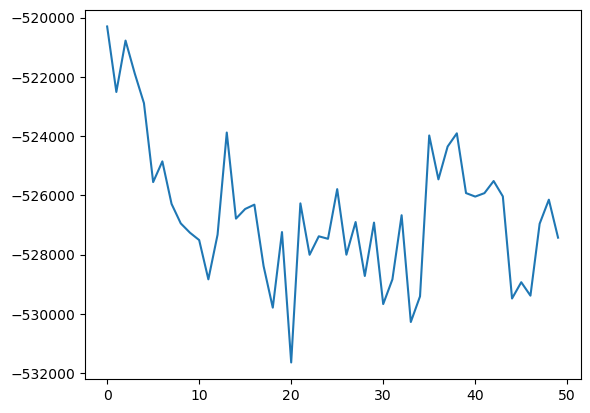

In [93]:
for i in histories:
    plt.plot(pd.DataFrame(i).T[1])

In [33]:
population = pop.Population(
initial_board=test_board,
size=10000
)

population.evolve(gens = 2000,
                    xo_prob = 0,
                    mut_prob = 0.8, 
                    select_type='tournament', 
                    xo = 'multi_point', 
                    elite_size= 10,
                    keep_distribution=False,
                    mutation='change', 
                    swap_number = 3)

Best individual of gen #1: 45. Mean fitness: 63.3059
Best individual of gen #2: 45. Mean fitness: 64.251
Best individual of gen #3: 45. Mean fitness: 63.6732
Best individual of gen #4: 45. Mean fitness: 63.6267


KeyboardInterrupt: 

array([[0, 2, 9, 0, 7, 1, 4, 0, 6],
       [0, 0, 4, 6, 8, 3, 0, 0, 7],
       [6, 7, 0, 9, 0, 0, 0, 0, 8],
       [0, 0, 0, 4, 0, 7, 0, 0, 3],
       [0, 6, 2, 0, 1, 0, 8, 7, 9],
       [5, 3, 0, 0, 9, 0, 0, 0, 4],
       [0, 0, 0, 1, 0, 8, 7, 0, 5],
       [7, 9, 5, 2, 0, 0, 0, 8, 0],
       [0, 0, 1, 0, 0, 0, 6, 4, 2]], dtype=object)